## User Behaviour Analysis
We tried to analize users behaviour of www.narasi.tv website to gain insight of which element of the pages are perform better than the other. The data is exported from 2019, 1st June - 30th June.

FullStory analysis can be accessed here: https://quip.com/COOaAkaJ83VN/User-Behavior

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('events.csv')

In [2]:
del df['Unnamed: 0']

### Load the dataset 
We load the data from Google Analytics as per June 2019 that consists several fields as shown below. To get this data we use the code from GA_reporting_API-master (https://github.com/jing-jin-mc/GA_reporting_API) so we could access the data directly to our GA account without exporting it manually.

In [3]:
df.head()

,ga:avgTimeOnPage,ga:bounceRate,ga:eventAction,ga:eventCategory,ga:eventLabel,ga:exitPagePath,ga:landingPagePath,ga:secondPagePath,ga:sessions,ga:totalEvents,ga:uniqueEvents,ga:users
0,0.0,0.0,10%,Brightcove Player,6003546469001 | Heboh Nyoba Make Up | Sarah Se...,(not set),(not set),(not set),0.0,3.0,3.0,3.0
1,0.0,0.0,10%,Brightcove Player,6007035258001 | Jadi Crazy Rich,(not set),(not set),(not set),0.0,5.0,5.0,5.0
2,0.0,0.0,10%,Brightcove Player,6010066119001 | celebrating-stay-at-home-mom,(not set),(not set),(not set),0.0,2.0,2.0,2.0
3,0.0,0.0,10%,Brightcove Player,6010928977001 | sinopbro-dan-ngalor-ngibul-ber...,(not set),(not set),(not set),0.0,1.0,1.0,1.0
4,0.0,0.0,10%,Brightcove Player,6011523382001 | indonesians-abroad,(not set),(not set),(not set),0.0,1.0,1.0,1.0


Metrics that are included on this analysis are:
1. ga:avgTimeOnPage , (Average Time Spent per Page)
2. ga:bounceRate , (Bounce Rate, the percentage of visitors to a particular website who navigate away from the site after viewing only one page.)
3. ga:sessions , (A group of interactions one user takes within a given time frame on the website)
4. ga:totalEvents , (Total events that already define in the tracking code)
5. ga:uniqueEvents , (Counts the number of events with distinct Event attributes)
6. ga:users , (Total number of users for the requested time period)

In [4]:
df.describe()

,ga:avgTimeOnPage,ga:bounceRate,ga:sessions,ga:totalEvents,ga:uniqueEvents,ga:users
count,28422.0,28422.0,28422.000000,28422.000000,28422.000000,28422.000000
mean,0.0,0.0,4.931215,20.450074,13.655619,13.430512
std,0.0,0.0,30.709014,208.397964,136.677375,131.049842
min,0.0,0.0,0.000000,1.000000,1.000000,1.000000
25%,0.0,0.0,0.000000,1.000000,1.000000,1.000000
50%,0.0,0.0,1.000000,2.000000,1.000000,1.000000
75%,0.0,0.0,1.000000,6.000000,4.000000,4.000000
max,0.0,0.0,1648.000000,14246.000000,11069.000000,10371.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The first thing I want to do is check how many eventActions are triggered during June 2018

In [6]:
df['ga:totalEvents'].sum()

581232.0

So there are 581232 are being triggered in June 2019. In www.narasi.tv we defined the events as how many interaction people have mainly on our video player (Youtube Player, Brightcove Player). Details of the events are shown in the <b>ga:eventAction</b> & <b>ga:eventCategory</b> columns.

After that we wanted to find which eventActions are most triggered during this month. We plot the eventAction versus its own counts.

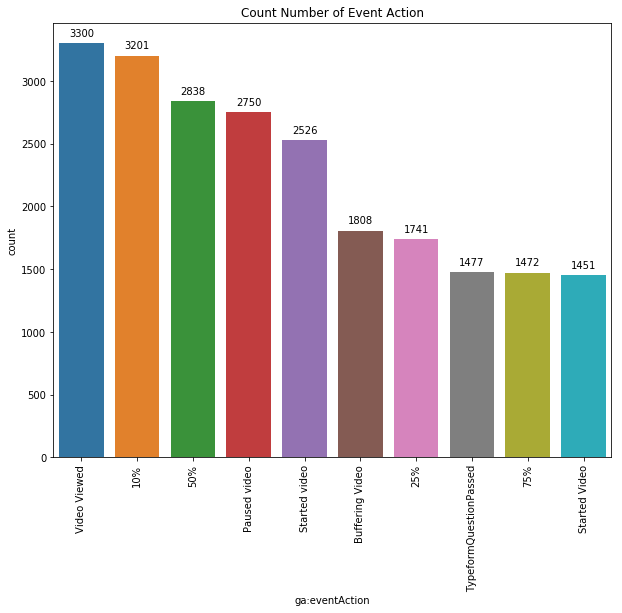

In [8]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x = 'ga:eventAction', data=df, order = df['ga:eventAction'].value_counts().iloc[:10].index)

ax.set_title("Count Number of Event Action")

plt.xticks(rotation=90)

rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va=va)

As we may see above, Video Viewed event <b>(When user started the video then this event would be triggered)</b> is triggred 3300 times, as we may know that our video players are using Youtube and Brightcove, so we break down the Player to gain more specific insights.

10%, 25%, 50%, and 75% are events which shown how many portion of the videos are already watched.

In [9]:
df_player = df.loc[(df['ga:eventCategory'] == 'Brightcove Player') | (df['ga:eventCategory'] == 'youtube')]
df_player['ga:eventAction'] = df_player['ga:eventAction'].str.lower()

/Users/anggapradiktas/anaconda3/envs/py36/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Above, we tried to find out which events are triggered either from youtube player or brightcove player. After that we tried to visualize the data so that could easily identified which events are belong to any of the player

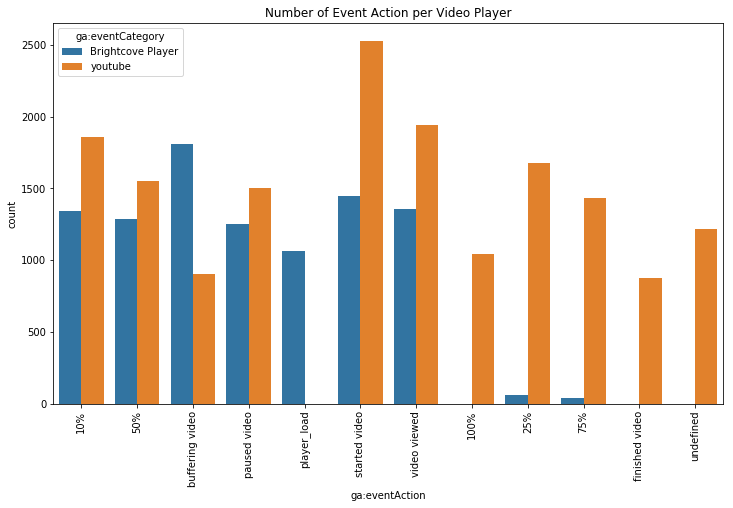

In [10]:
fig, ax11 = plt.subplots(1,1, figsize=[12,7])

plt.xticks(rotation=90)

ax11.set_title("Number of Event Action per Video Player")

g1 = sns.countplot(x = 'ga:eventAction', hue = 'ga:eventCategory', data=df_player, ax=ax11)

As we seen on the graph above that some tracking are still not properly setted up (sorry for that, i am fixing it now). 100% and finished video have the same meaning so I need to group it into one, and also on Brightcove players, there is no 100% or finished video tracking. We can neglect the <b>undefined</b> cause it means that the tracking were recording an event that we didn't define which is basically ok.

From the graph we can conclude that
1. Brightcove player encounter more buffering than youtube player
2. There is a significant gap between player that already completed 75% of events. This could be that more video are using Youtube player than Brightcove, this also supported by number of <b>started video</b>, still need to investigate more

/Users/anggapradiktas/anaconda3/envs/py36/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


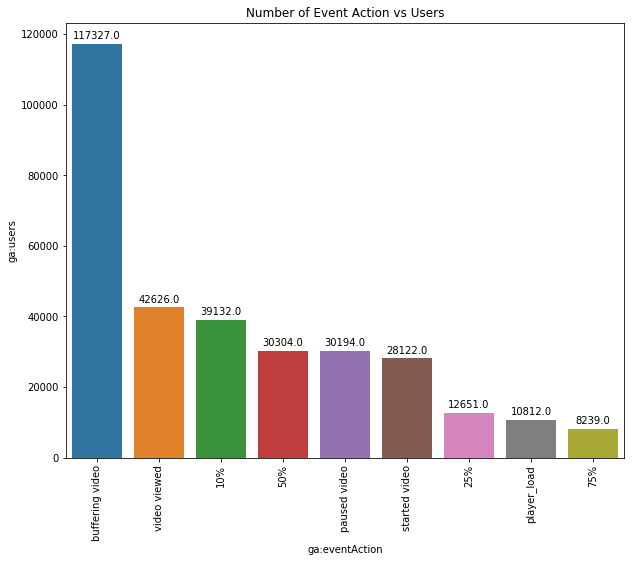

In [11]:
plt.figure(figsize=(10,8))

df_1 = df.groupby('ga:eventAction', as_index=False).agg({'ga:users':'sum'}).sort_values(by=['ga:users'], ascending=False)
df_1['ga:eventAction'] = df_1['ga:eventAction'].str.lower()
ax_1 = sns.barplot(x = 'ga:eventAction', y = 'ga:users', data=df_1.head(10))

plt.xticks(rotation = 90)

ax_1.set_title("Number of Event Action vs Users")

rects_1 = ax_1.patches

for rect in rects_1:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 3
    
    va = 'bottom'
    
    label = '{}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext = (0, space),
        textcoords = 'offset points',
        ha = 'center',
        va = va)

From the graph above we could see that more users encounter Buffering Video, than any other events. Buffering video is something we want to figure out how many buffering video users encounter in our platform. The number shown here is pretty high than other events, means that we still need to find a way how to reduce the number of users that encounter buffering unless the buffering was caused users internet connection itself

In [12]:
df['BC_video'] = df['ga:eventLabel']#.str.split('|').str[1]

Here, we wanted to know which video was being viewed from column <b>ga:eventLabel</b>.

In [13]:
df.head()

,ga:avgTimeOnPage,ga:bounceRate,ga:eventAction,ga:eventCategory,ga:eventLabel,ga:exitPagePath,ga:landingPagePath,ga:secondPagePath,ga:sessions,ga:totalEvents,ga:uniqueEvents,ga:users,BC_video
0,0.0,0.0,10%,Brightcove Player,6003546469001 | Heboh Nyoba Make Up | Sarah Se...,(not set),(not set),(not set),0.0,3.0,3.0,3.0,6003546469001 | Heboh Nyoba Make Up | Sarah Se...
1,0.0,0.0,10%,Brightcove Player,6007035258001 | Jadi Crazy Rich,(not set),(not set),(not set),0.0,5.0,5.0,5.0,6007035258001 | Jadi Crazy Rich
2,0.0,0.0,10%,Brightcove Player,6010066119001 | celebrating-stay-at-home-mom,(not set),(not set),(not set),0.0,2.0,2.0,2.0,6010066119001 | celebrating-stay-at-home-mom
3,0.0,0.0,10%,Brightcove Player,6010928977001 | sinopbro-dan-ngalor-ngibul-ber...,(not set),(not set),(not set),0.0,1.0,1.0,1.0,6010928977001 | sinopbro-dan-ngalor-ngibul-ber...
4,0.0,0.0,10%,Brightcove Player,6011523382001 | indonesians-abroad,(not set),(not set),(not set),0.0,1.0,1.0,1.0,6011523382001 | indonesians-abroad


In [14]:
df['BC_video'] = df['BC_video'].str.lower()

In [15]:
df['BC_video'] = df['BC_video'].str.replace('\W', ' ')

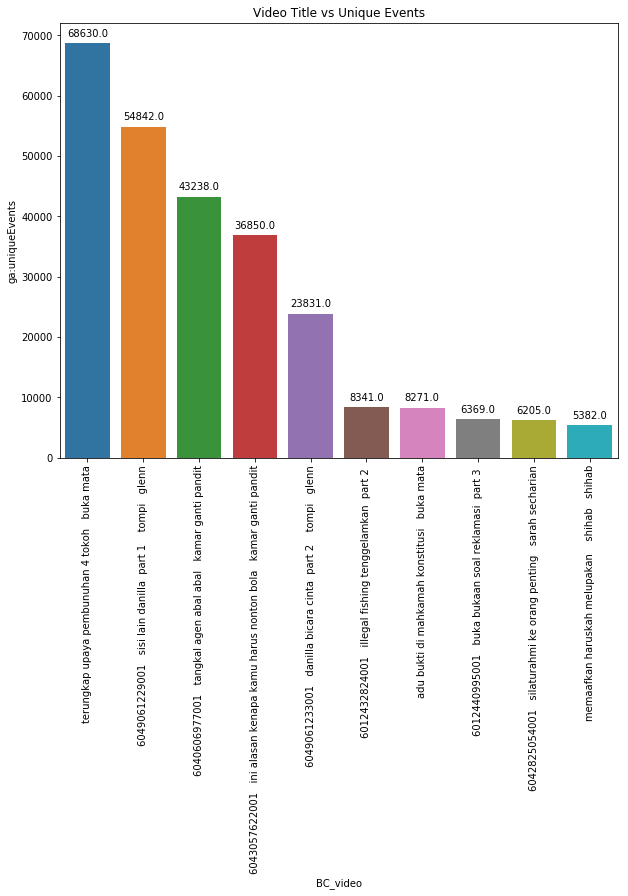

In [18]:
plt.figure(figsize=(10,8))

df_2 = df.groupby('BC_video', as_index = False).agg({'ga:uniqueEvents':'sum'}).sort_values(by=['ga:uniqueEvents'],ascending=False)
ax_2 = sns.barplot(x = 'BC_video', y = 'ga:uniqueEvents', data = df_2.head(10))

plt.xticks(rotation=90)

ax_2.set_title("Video Title vs Unique Events")

rects_2 = ax_2.patches

for rect in rects_2:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)
        

Above, we see that Buka Mata, Terungkap Upaya Pembunuhan 4 Tokoh receive the highest unique events. This episode of Buka Mata is using Youtube Player as its video player, Unique event means that how many distinct events were users committed or encountered to the video such as 10%, 50%, Buffering, and so on so forth.

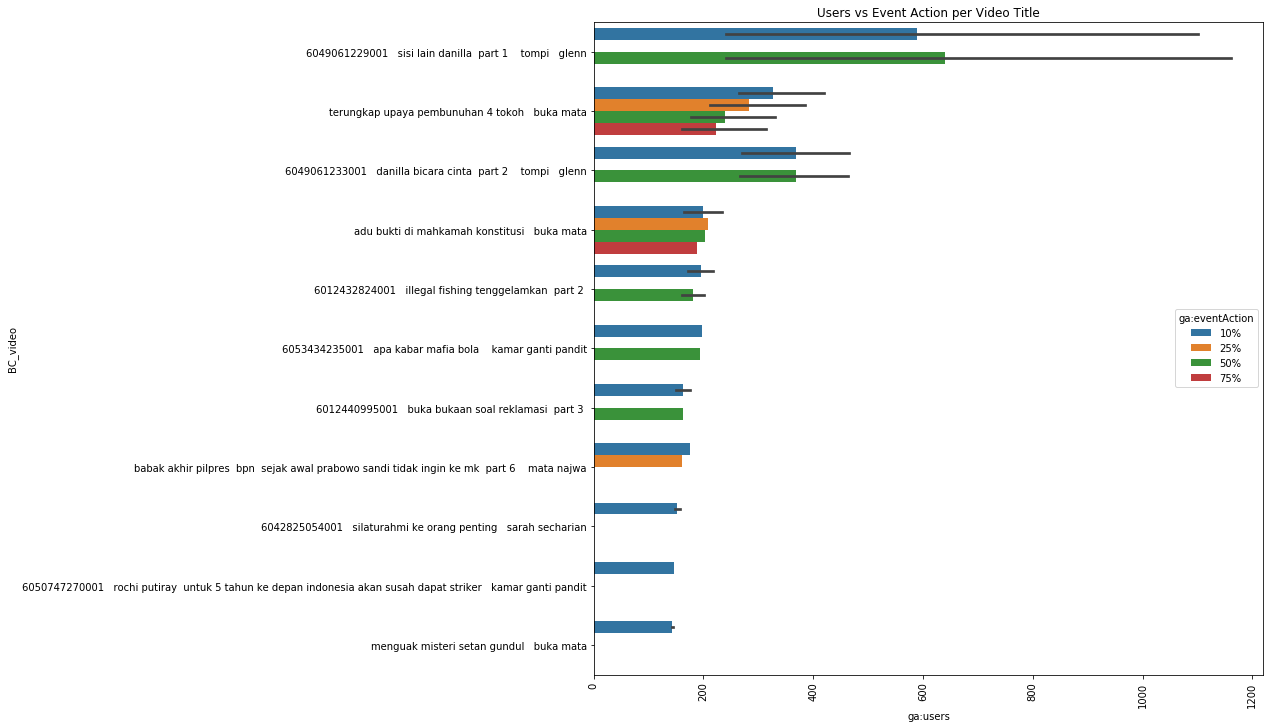

In [20]:
df_video = df.loc[(df['ga:eventAction'] == '10%') | (df['ga:eventAction'] == '25%') | (df['ga:eventAction'] == '50%') | (df['ga:eventAction'] == '75%')]
df_video = df_video.sort_values(by=['ga:uniqueEvents'], ascending=False)

fig, ax12 = plt.subplots(1,1, figsize=(12,12))

ax12.set_title("Users vs Event Action per Video Title")

plt.xticks(rotation=90)

g2 = sns.barplot(y = 'BC_video', x = 'ga:users', hue = 'ga:eventAction', hue_order = ['10%','25%','50%','75%'], 
                 data = df_video.head(120))



Sisi Lain Danila received 25% and 50% event the highest compared to the rest. Means that user that already reach 25% part of the video will recorder as 25%, so on and so forth. Let's see in the second video 'Terungkap Upaya Pembunuhan 4 Tokoh', number of percentage video views events is decrease as it reach higher viewed percentage.

Issue: Events that supposed to be tracked are 10%, 25%, 50%, 75%, but at some cases the events 25% and 75% were not tracked, this cases are found in video that used Brightcove Player.

In [21]:
df_page = pd.read_csv('pagePath.csv')
df_page['full_page_path'] = df_page[['ga:landingPagePath','ga:secondPagePath','ga:exitPagePath']].apply(lambda x: ' & '.join(x), axis = 1)



In [22]:
df_page['full_page_path'] = df_page['full_page_path'].apply(lambda x: x.split('?')[0])

Now, we tried to identify full page path that been accessed by the users. This could give us a glimpse of user activity in our website, which pages were already visited before they exited.

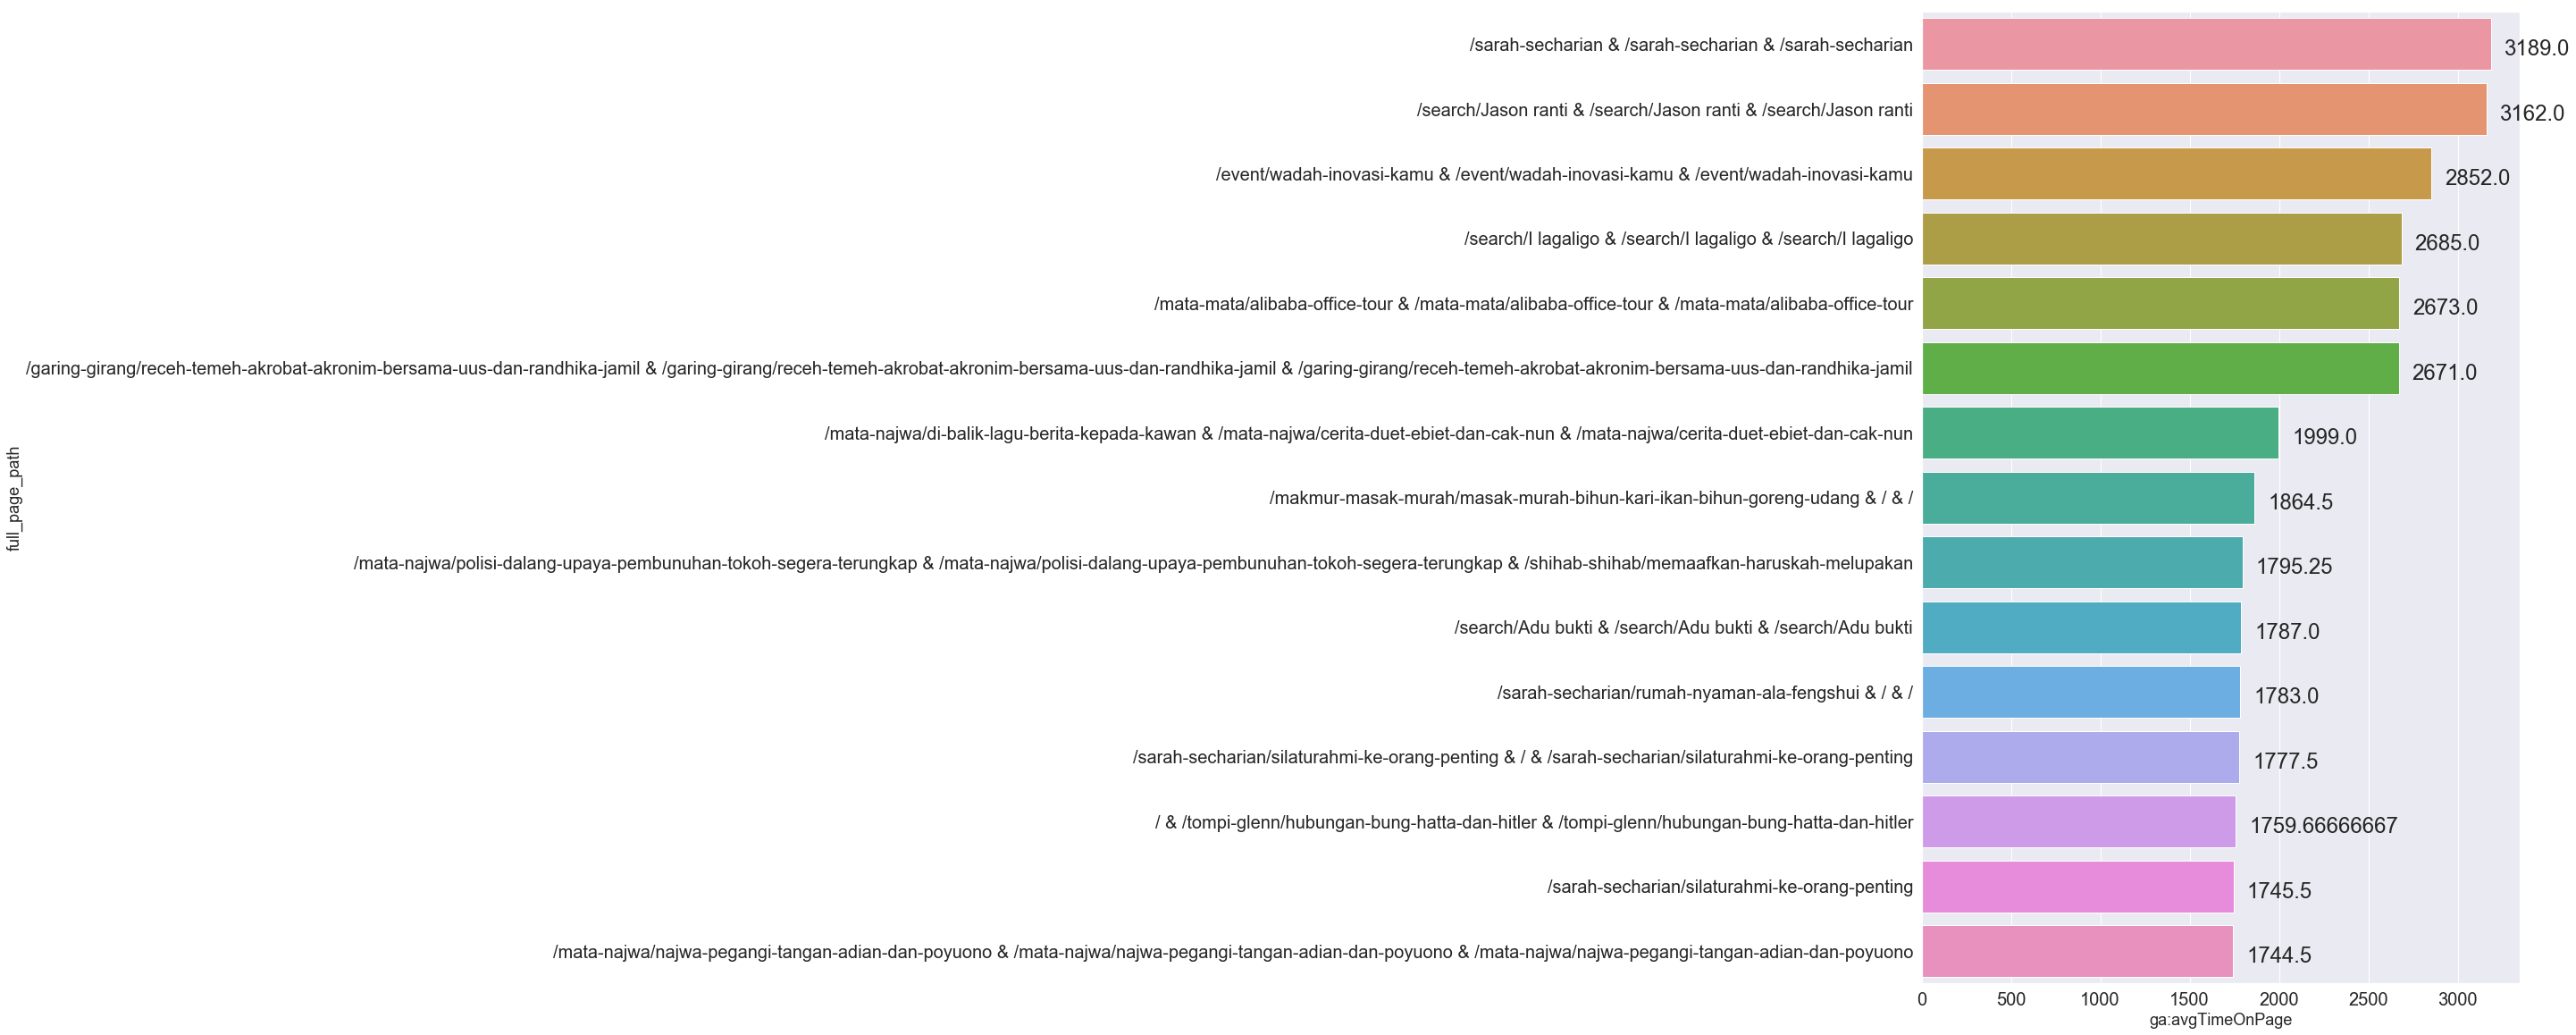

In [31]:
plt.figure(figsize=(12,20))

df_3 = df_page.groupby('full_page_path', as_index=False).agg({'ga:avgTimeOnPage':'mean'}).sort_values(by=['ga:avgTimeOnPage'], ascending=False)
ax_3 = sns.barplot(y = 'full_page_path', x = 'ga:avgTimeOnPage', data=df_3.head(15))
#plt.xticks(rotation=90)

ax_3.tick_params(labelsize=20)
sns.set(font_scale = 2)

rects_3 = ax_3.patches

for rect in rects_3:
    y_value = rect.get_y() + rect.get_height() / 2
    x_value = rect.get_width()
    
    space = 5
    
    va = 'top'
    
    label = '{}'.format(x_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(15, space),
        textcoords='offset points',
        ha = 'left',
        va = va)
        

The graph above shown the page path from (<b>landing-page</b> & <b>second-page</b> & <b>exit-page</b>) as we called it full_page_path. This figure plot between full_page and Average Time On Page, as shown, the highest average is a user who landed on /sarah-secharian page and stay in the /sarah-secharian page till they leave the page, spent on average 3189 second or 53 minute. 

The second highest average time on page is search page with keyword 'Jason ranti', spent about 52 minutes on that page until they exited. 

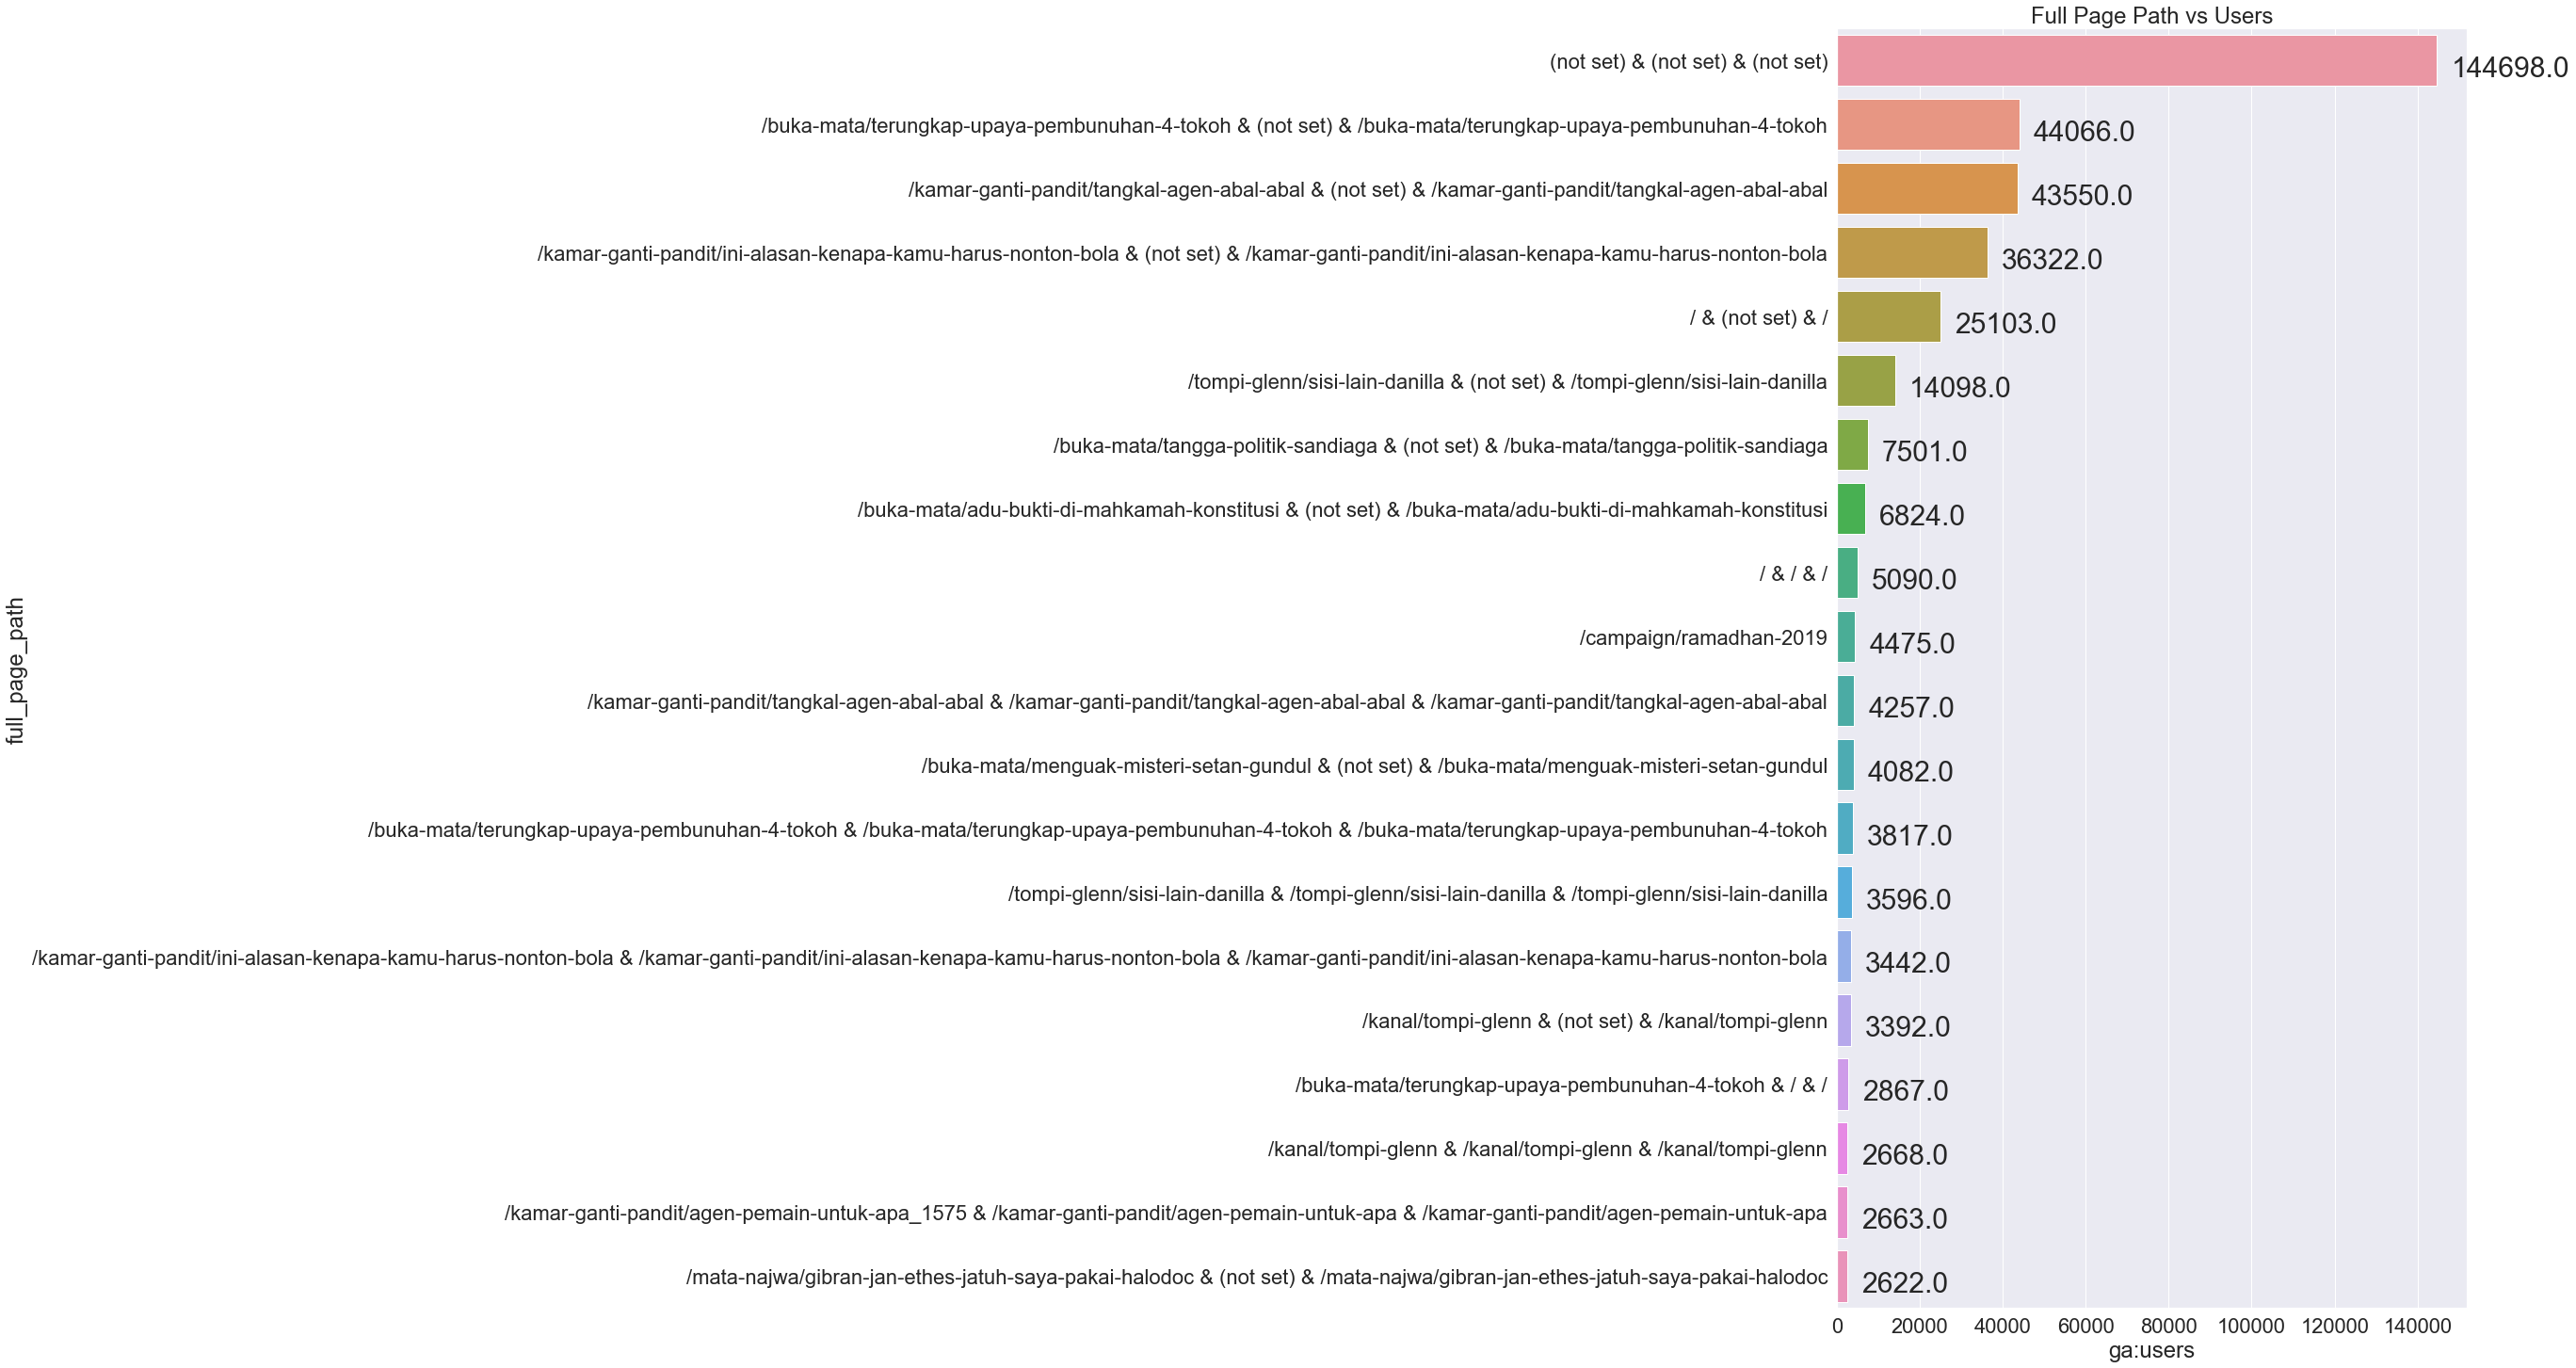

In [32]:
plt.figure(figsize=(12,25))

df_4 = df_page.groupby('full_page_path', as_index=False).agg({'ga:users':'sum'}).sort_values(by=['ga:users'], ascending=False)
ax_4 = sns.barplot(x = 'ga:users', y = 'full_page_path', data=df_4.head(20))

ax_4.set_title("Full Page Path vs Users")

sns.set(font_scale = 2.5)

rects_4 = ax_4.patches

for rect in rects_4:
    y_value = rect.get_y() + rect.get_height() / 2
    x_value = rect.get_width()
    
    space = 5
    
    va = 'top'
    
    label = '{}'.format(x_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(15, space),
        textcoords='offset points',
        ha = 'left',
        va = va)
        


Let's take a look at the first full_page_path that show <b> (not set) & (not set) & (not set) </b>, not set here means that we couldn't get valid information about user activity, it could be bad implementation of our tracking code, session expiry, or the page can not be crawled by Google (I need to check it which one is most probable could become the issues). 



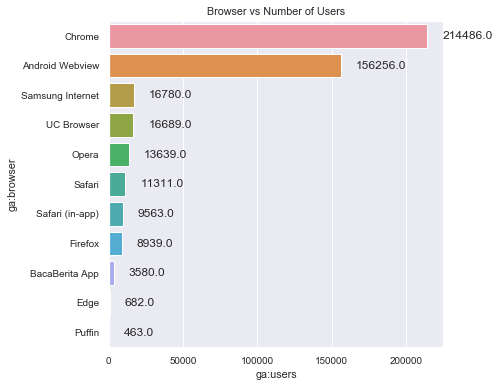

In [38]:
plt.figure(figsize=(6,6))

df_5 = df_page.groupby('ga:browser', as_index=False).agg({'ga:users':'sum'}).sort_values(by=['ga:users'], ascending=False)
ax_5 = sns.barplot(x = 'ga:users', y = 'ga:browser', data=df_5.head(11))

ax_5.set_title("Browser vs Number of Users")

sns.set(font_scale = 1)

rects_5 = ax_5.patches

for rect in rects_5:
    y_value = rect.get_y() + rect.get_height() / 2
    x_value = rect.get_width()
    
    space = 5
    
    va = 'top'
    
    label = '{}'.format(x_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(15, space),
        textcoords='offset points',
        ha = 'left',
        va = va)

The number of user using Chrome during June 2019 was the highest compared to any other web browsers, second was Android Webview and third was Samsung Internet. Here we can conclude that our web should be optimize for this top 3 browser since our users mostly coming from there browsers.

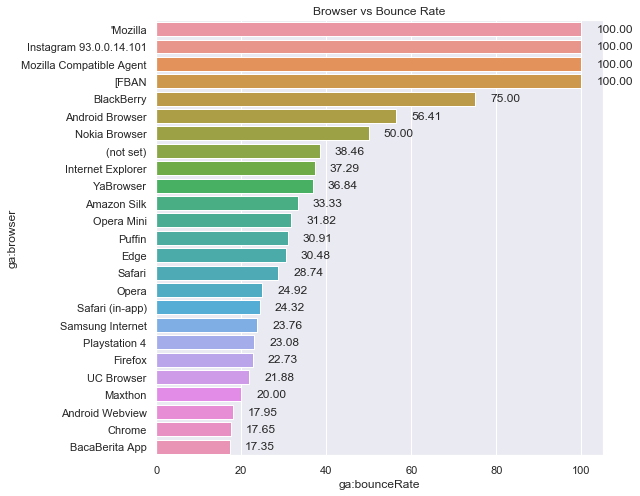

In [39]:
plt.figure(figsize=(8,8))

df_6 = df_page.groupby('ga:browser', as_index=False).agg({'ga:bounceRate':'mean'}).sort_values(by=['ga:bounceRate'], ascending=False)
ax_6 = sns.barplot(x = 'ga:bounceRate', y = 'ga:browser', data=df_6.head(30))

ax_6.set_title("Browser vs Bounce Rate")

#sns.set(font_scale = 1)

rects_6 = ax_6.patches

for rect in rects_6:
    y_value = rect.get_y() + rect.get_height() / 2
    x_value = rect.get_width()
    
    space = 5
    
    va = 'top'
    
    label = '{:.2f}'.format(x_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(15, space),
        textcoords='offset points',
        ha = 'left',
        va = va)

This graph shown Browser used by users vs its bounce rate, on June 2019, Mozilla, Instagram, and FBAN(facebook browser) got 100% of bounce rate means once users landed on the specific landing page, without bother they just quit right after that with no other interaction.